# Candlestick Short Line Candle

https://www.investopedia.com/terms/s/short-line-candle.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Shooting Star

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

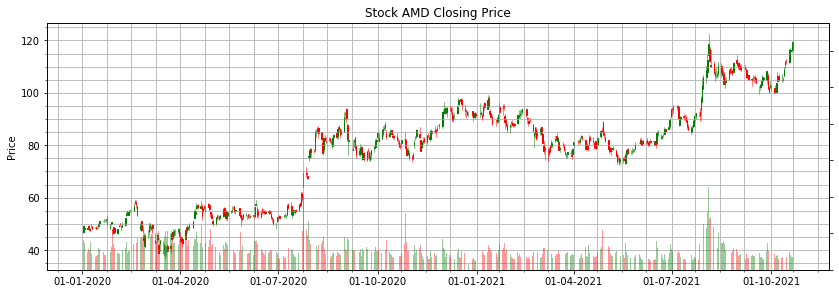

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
short_line = talib.CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Close'])

short_line = short_line[short_line != 0]

In [6]:
df['short_line'] = talib.CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['short_line'] !=0]

,Open,High,Low,Close,Adj Close,Volume,short_line
Date,,,,,,,
2020-01-22,51.630001,51.880001,51.200001,51.430000,51.430000,40772200,-100
2020-02-12,54.529999,54.849998,53.529999,53.889999,53.889999,45994900,-100
2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600,100
2020-04-02,43.400002,45.279999,43.099998,44.490002,44.490002,79024100,100
2020-04-08,48.070000,49.000000,47.610001,48.790001,48.790001,64930800,100
2020-04-22,54.910000,56.150002,54.340000,55.919998,55.919998,63041600,100
2020-04-27,57.439999,58.000000,56.250000,56.490002,56.490002,62568100,-100
2020-05-07,52.930000,52.970001,51.619999,51.950001,51.950001,48956600,-100
2020-05-08,52.150002,53.270000,51.810001,53.189999,53.189999,40686100,100


In [8]:
df['Adj Close'].loc[df['short_line'] !=0]

Date
2020-01-22     51.430000
2020-02-12     53.889999
2020-03-30     47.860001
2020-04-02     44.490002
2020-04-08     48.790001
2020-04-22     55.919998
2020-04-27     56.490002
2020-05-07     51.950001
2020-05-08     53.189999
2020-05-18     54.590000
2020-06-01     53.630001
2020-06-03     52.730000
2020-06-18     54.040001
2020-06-23     53.990002
2020-07-02     52.340000
2020-07-17     55.040001
2020-08-03     77.669998
2020-08-06     86.709999
2020-08-17     82.419998
2020-08-18     81.660004
2020-08-19     81.089996
2020-08-28     85.550003
2020-09-14     77.900002
2020-09-17     76.550003
2020-09-18     74.930000
2020-11-13     81.430000
2020-12-15     97.120003
2020-12-17     96.839996
2020-12-24     91.809998
2020-12-31     91.709999
2021-01-05     92.769997
2021-01-14     90.790001
2021-02-03     87.889999
2021-02-04     87.839996
2021-02-05     87.900002
2021-03-09     78.529999
2021-03-10     77.519997
2021-03-11     81.230003
2021-03-12     81.050003
2021-05-20     78.05

In [9]:
df['short_line'].loc[df['short_line'] !=0].index

DatetimeIndex(['2020-01-22', '2020-02-12', '2020-03-30', '2020-04-02',
               '2020-04-08', '2020-04-22', '2020-04-27', '2020-05-07',
               '2020-05-08', '2020-05-18', '2020-06-01', '2020-06-03',
               '2020-06-18', '2020-06-23', '2020-07-02', '2020-07-17',
               '2020-08-03', '2020-08-06', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-28', '2020-09-14', '2020-09-17',
               '2020-09-18', '2020-11-13', '2020-12-15', '2020-12-17',
               '2020-12-24', '2020-12-31', '2021-01-05', '2021-01-14',
               '2021-02-03', '2021-02-04', '2021-02-05', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-05-20',
               '2021-05-26', '2021-06-22', '2021-06-25', '2021-08-12',
               '2021-08-17', '2021-08-20', '2021-08-26', '2021-09-01',
               '2021-09-02', '2021-09-24', '2021-10-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
short_line

Date
2020-01-22   -100
2020-02-12   -100
2020-03-30    100
2020-04-02    100
2020-04-08    100
2020-04-22    100
2020-04-27   -100
2020-05-07   -100
2020-05-08    100
2020-05-18   -100
2020-06-01    100
2020-06-03   -100
2020-06-18   -100
2020-06-23   -100
2020-07-02   -100
2020-07-17   -100
2020-08-03   -100
2020-08-06    100
2020-08-17    100
2020-08-18   -100
2020-08-19   -100
2020-08-28    100
2020-09-14    100
2020-09-17    100
2020-09-18   -100
2020-11-13   -100
2020-12-15    100
2020-12-17   -100
2020-12-24    100
2020-12-31   -100
2021-01-05    100
2021-01-14   -100
2021-02-03   -100
2021-02-04   -100
2021-02-05   -100
2021-03-09    100
2021-03-10   -100
2021-03-11    100
2021-03-12    100
2021-05-20    100
2021-05-26    100
2021-06-22    100
2021-06-25   -100
2021-08-12   -100
2021-08-17    100
2021-08-20    100
2021-08-26   -100
2021-09-01   -100
2021-09-02   -100
2021-09-24    100
2021-10-04   -100
dtype: int32

In [11]:
short_line.index

DatetimeIndex(['2020-01-22', '2020-02-12', '2020-03-30', '2020-04-02',
               '2020-04-08', '2020-04-22', '2020-04-27', '2020-05-07',
               '2020-05-08', '2020-05-18', '2020-06-01', '2020-06-03',
               '2020-06-18', '2020-06-23', '2020-07-02', '2020-07-17',
               '2020-08-03', '2020-08-06', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-28', '2020-09-14', '2020-09-17',
               '2020-09-18', '2020-11-13', '2020-12-15', '2020-12-17',
               '2020-12-24', '2020-12-31', '2021-01-05', '2021-01-14',
               '2021-02-03', '2021-02-04', '2021-02-05', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-05-20',
               '2021-05-26', '2021-06-22', '2021-06-25', '2021-08-12',
               '2021-08-17', '2021-08-20', '2021-08-26', '2021-09-01',
               '2021-09-02', '2021-09-24', '2021-10-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,short_line
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-15,112.510002,112.839996,111.110001,112.120003,112.120003,34177700,0
2021-10-18,111.900002,116.879997,111.370003,116.430000,116.430000,47537800,0
2021-10-19,116.160004,117.169998,114.470001,116.330002,116.330002,39593900,0


Text(0, 0.5, 'Price')

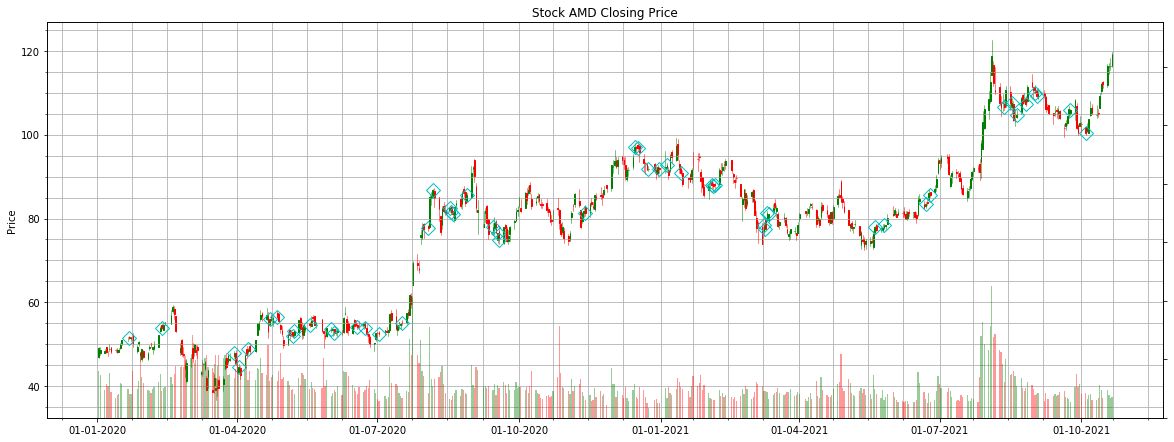

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['short_line'] !=0].index, df['Adj Close'].loc[df['short_line'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-10-10']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,short_line,VolumePositive
0,738034.0,111.300003,111.849998,109.849998,109.989998,109.989998,38579600,-100,False
1,738035.0,110.320000,110.879997,108.769997,109.199997,109.199997,40090500,-100,False
2,738036.0,108.849998,111.169998,108.500000,109.919998,109.919998,42605800,0,True
3,738040.0,109.959999,110.580002,108.660004,109.150002,109.150002,28815200,0,False
4,738041.0,108.879997,109.300003,105.519997,106.169998,106.169998,43067900,0,False


Text(0, 0.5, 'Price')

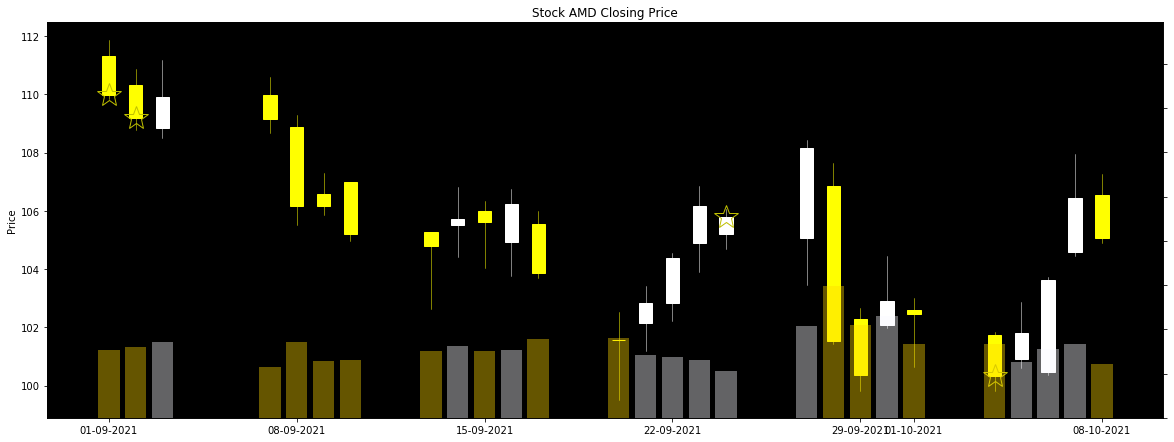

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='white', colordown='yellow', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['short_line'] !=0].index, df['Adj Close'].loc[df['short_line'] !=0],
                '*y', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'ghostwhite', False: 'gold'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

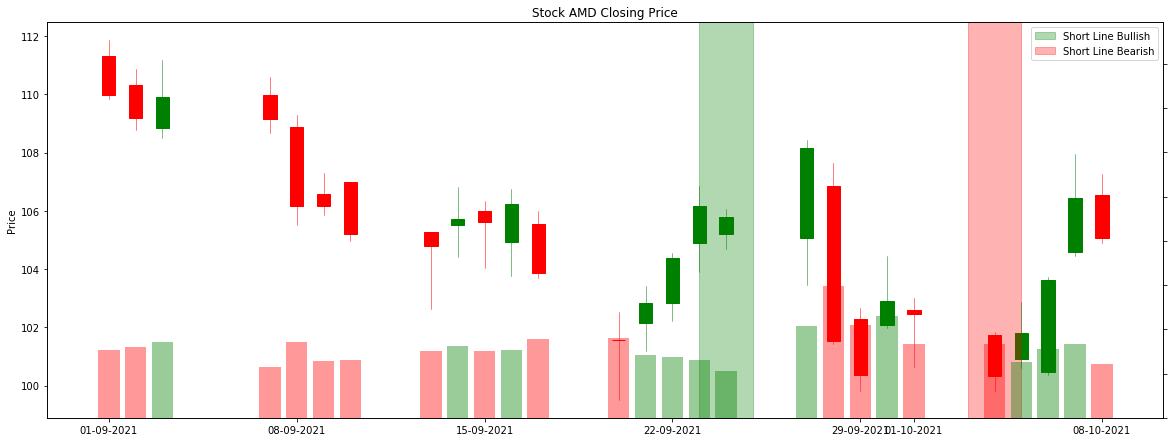

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,9,23)), date2num(datetime(2021,9,25)), 
           label="Short Line Bullish",color="green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,10,3)), date2num(datetime(2021,10,5)), 
           label="Short Line Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')